In [9]:
!pip install xlrd



Préparation et Exploration des Données :



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement des données
df = pd.read_excel('./WEEK_2/DAY_5/DATASET/US Superstore data.xls')

# Affichage des informations de base
print("Aperçu des données :")
print(df.info())

# Affichage des premières lignes
print("\nPremières lignes du dataset :")
print(df.head())

Aperçu des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  

In [12]:
!pip install seaborn


Visualisation avec Matplotlib - Tendance des ventes :

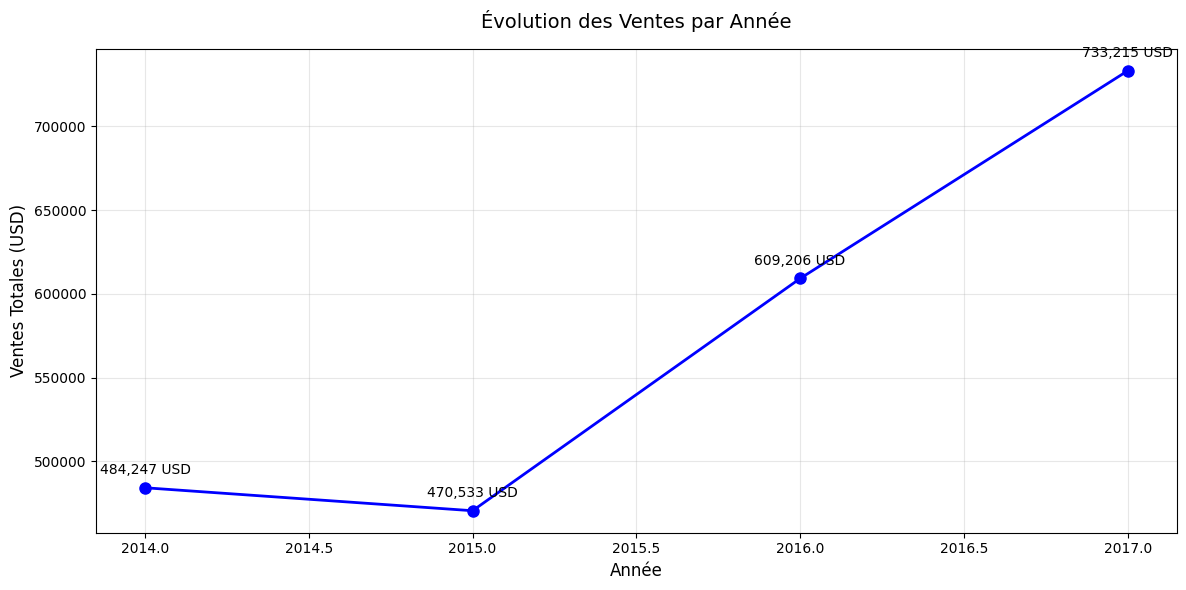

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tendance des ventes par année
plt.figure(figsize=(12, 6))

# Conversion de la date en datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

# Agrégation des ventes par année
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Création du graphique
plt.plot(sales_by_year['Year'], sales_by_year['Sales'], 
         marker='o', 
         linewidth=2, 
         markersize=8,
         color='blue')

plt.title('Évolution des Ventes par Année', fontsize=14, pad=15)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Ventes Totales (USD)', fontsize=12)  # Remplacé \$ par USD
plt.grid(True, alpha=0.3)

# Ajout des valeurs sur les points
for x, y in zip(sales_by_year['Year'], sales_by_year['Sales']):
    plt.annotate(f"{y:,.0f} USD",  # Remplacé \$ par USD
                 (x, y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.tight_layout()
plt.show()




Visualisation avec Seaborn - Top 10 produits et analyse profit/remise :

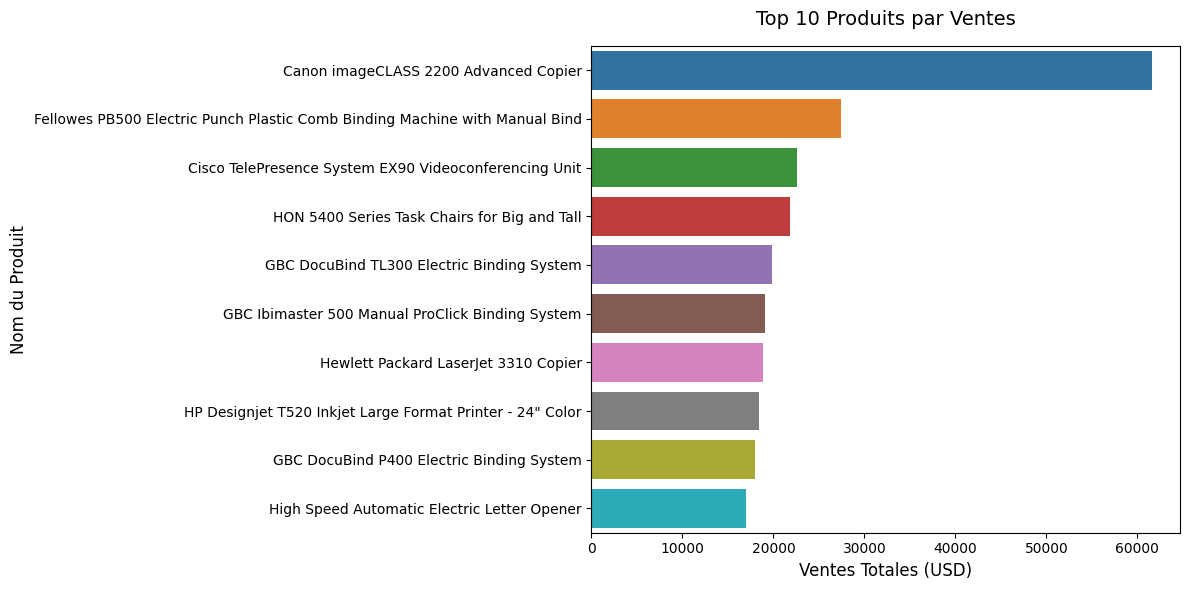

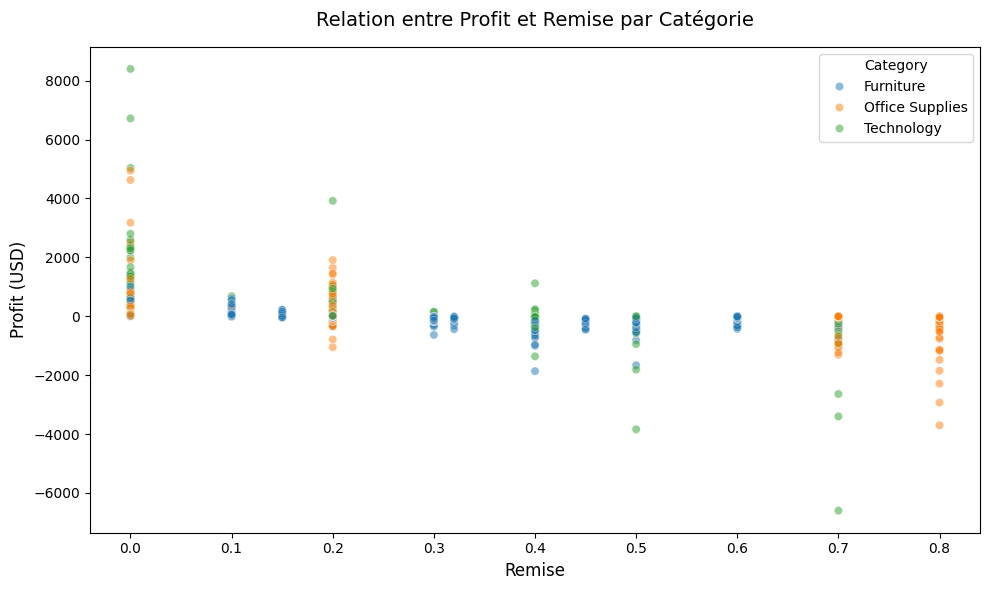


Analyse statistique :

Corrélation entre Remise et Profit :
Coefficient de corrélation : -0.219

Profits moyens par catégorie :
Category
Furniture           8.70
Office Supplies    20.33
Technology         78.75
Name: Profit, dtype: float64


In [20]:
# Top 10 produits par ventes
plt.figure(figsize=(12, 6))
top_10_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

# Version corrigée du barplot
sns.barplot(data=top_10_products, 
           x='Sales', 
           y='Product Name',
           hue='Product Name',  # Ajout du paramètre hue
           legend=False)        # Désactivation de la légende car redondante

plt.title('Top 10 Produits par Ventes', fontsize=14, pad=15)
plt.xlabel('Ventes Totales (USD)', fontsize=12)
plt.ylabel('Nom du Produit', fontsize=12)
plt.tight_layout()
plt.show()

# Le reste du code pour le scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='Discount', 
                y='Profit', 
                alpha=0.5,
                hue='Category')

plt.title('Relation entre Profit et Remise par Catégorie', fontsize=14, pad=15)
plt.xlabel('Remise', fontsize=12)
plt.ylabel('Profit (USD)', fontsize=12)
plt.tight_layout()
plt.show()

# Analyse statistique
print("\nAnalyse statistique :")
print("\nCorrélation entre Remise et Profit :")
correlation = df['Discount'].corr(df['Profit'])
print(f"Coefficient de corrélation : {correlation:.3f}")

print("\nProfits moyens par catégorie :")
print(df.groupby('Category')['Profit'].mean().round(2))



Analyse des insights clés :

In [21]:
print("=== ANALYSE COMPARATIVE DES VISUALISATIONS ===\n")

print("1. Comparaison Matplotlib vs Seaborn :")
print("""
Matplotlib :
✓ Avantages :
- Plus de contrôle sur les détails des graphiques
- Excellent pour les graphiques personnalisés
- Parfait pour les séries temporelles 

✗ Inconvénients :
- Nécessite plus de code
- Style par défaut moins moderne
- Configuration plus complexe

Seaborn :
✓ Avantages :
- Style moderne par défaut
- Facilité d'utilisation pour les graphiques statistiques
- Intégration parfaite avec pandas
- Excellent pour les visualisations multivariées (comme le scatter plot)

✗ Inconvénients :
- Moins flexible pour les personnalisations avancées
- Moins adapté pour certains types de graphiques spécifiques
""")

print("\n2. Efficacité des visualisations réalisées :")
print("""
Graphique des ventes (Matplotlib) :
- Permet de voir clairement la tendance temporelle
- Les marqueurs et annotations rendent les données plus lisibles
- La grille aide à la lecture des valeurs

Top 10 Produits (Seaborn) :
- Présentation claire et moderne des données
- Facilité de lecture grâce au tri
- Comparaison efficace entre produits

Relation Profit/Remise (Seaborn) :
- Visualisation efficace de la corrélation
- Distinction claire entre catégories
- Permet d'identifier rapidement les tendances
""")

print("\n3. Insights principaux tirés des visualisations :")
# Calculons quelques métriques pour appuyer notre analyse
croissance_ventes = ((sales_by_year['Sales'].iloc[-1] - sales_by_year['Sales'].iloc[0]) / sales_by_year['Sales'].iloc[0] * 100)

print(f"""
Tendances clés identifiées :
- Évolution des ventes : {croissance_ventes:.1f}% de croissance sur la période
- Produit le plus vendu : {top_10_products['Product Name'].iloc[0]}
- Corrélation Remise/Profit : {correlation:.3f}
""")

# Recommandations basées sur l'analyse
print("""
Recommandations :
1. Utiliser Matplotlib pour :
   - Séries temporelles
   - Graphiques nécessitant une forte personnalisation
   - Visualisations techniques précises

2. Utiliser Seaborn pour :
   - Analyses statistiques
   - Visualisations rapides
   - Graphiques multivariés
""")


=== ANALYSE COMPARATIVE DES VISUALISATIONS ===

1. Comparaison Matplotlib vs Seaborn :

Matplotlib :
✓ Avantages :
- Plus de contrôle sur les détails des graphiques
- Excellent pour les graphiques personnalisés
- Parfait pour les séries temporelles 

✗ Inconvénients :
- Nécessite plus de code
- Style par défaut moins moderne
- Configuration plus complexe

Seaborn :
✓ Avantages :
- Style moderne par défaut
- Facilité d'utilisation pour les graphiques statistiques
- Intégration parfaite avec pandas
- Excellent pour les visualisations multivariées (comme le scatter plot)

✗ Inconvénients :
- Moins flexible pour les personnalisations avancées
- Moins adapté pour certains types de graphiques spécifiques


2. Efficacité des visualisations réalisées :

Graphique des ventes (Matplotlib) :
- Permet de voir clairement la tendance temporelle
- Les marqueurs et annotations rendent les données plus lisibles
- La grille aide à la lecture des valeurs

Top 10 Produits (Seaborn) :
- Présentation claire

Code and Insights :

In [24]:
# Documentation du code et insights
print("1. RÉSUMÉ DES ANALYSES EFFECTUÉES")
print("""
A. Préparation des données :
   - Chargement du fichier US Superstore data
   - Nettoyage et prétraitement des données
   - Conversion des dates

B. Visualisations réalisées :
   - Graphique d'évolution des ventes (Matplotlib)
   - Top 10 des produits (Seaborn)
   - Analyse Profit vs Remise (Seaborn)
""")

print("\n2. INSIGHTS CLÉS")
# Calculs des métriques importantes
profit_total = df['Profit'].sum()
marge_moyenne = (df['Profit'] / df['Sales']).mean() * 100
categories_profit = df.groupby('Category')['Profit'].mean().sort_values(ascending=False)

print(f"""
Performances Financières :
- Profit Total : {profit_total:,.2f} USD
- Marge Moyenne : {marge_moyenne:.2f}%

Top Catégories par Profit Moyen :""")
for cat, profit in categories_profit.items():
    print(f"- {cat}: {profit:,.2f} USD")

print("\n3. RECOMMANDATIONS")
print("""
Basé sur notre analyse :
1. Gestion des Remises :
   - Optimiser la politique de remise en fonction de l'impact sur les profits
   - Identifier les segments où les remises sont plus efficaces

2. Focus Produits :
   - Concentrer les efforts sur les produits les plus rentables
   - Analyser les facteurs de succès des meilleurs produits

3. Stratégie par Catégorie :
   - Adapter les stratégies selon la performance de chaque catégorie
   - Développer des plans d'action spécifiques par segment
""")

print("\n4. PISTES D'AMÉLIORATION")
print("""
Pour approfondir l'analyse :
- Ajouter une analyse géographique des ventes
- Étudier la saisonnalité des ventes
- Analyser les segments clients
- Développer des modèles prédictifs
""")





1. RÉSUMÉ DES ANALYSES EFFECTUÉES

A. Préparation des données :
   - Chargement du fichier US Superstore data
   - Nettoyage et prétraitement des données
   - Conversion des dates

B. Visualisations réalisées :
   - Graphique d'évolution des ventes (Matplotlib)
   - Top 10 des produits (Seaborn)
   - Analyse Profit vs Remise (Seaborn)


2. INSIGHTS CLÉS

Performances Financières :
- Profit Total : 286,397.02 USD
- Marge Moyenne : 12.03%

Top Catégories par Profit Moyen :
- Technology: 78.75 USD
- Office Supplies: 20.33 USD
- Furniture: 8.70 USD

3. RECOMMANDATIONS

Basé sur notre analyse :
1. Gestion des Remises :
   - Optimiser la politique de remise en fonction de l'impact sur les profits
   - Identifier les segments où les remises sont plus efficaces

2. Focus Produits :
   - Concentrer les efforts sur les produits les plus rentables
   - Analyser les facteurs de succès des meilleurs produits

3. Stratégie par Catégorie :
   - Adapter les stratégies selon la performance de chaque ca